In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [353]:
# save to pandas df from excel
data = pd.read_excel('for_clustering.xlsx', engine='openpyxl')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [354]:
data.head(10)

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,0.042788,1,1,22,3,557.97,1,1,1,1
5,5820,126.7058,31,2,54.6964,75,3927.88,524,23,1,...,0.086650,1,1,15,2,283.75,1,0,1,1
6,5828,200.1724,49,2,77.2001,129,9808.45,674,29,13,...,0.008934,1,0,49,12,828.24,1,1,2,2
7,5834,322.5265,29,4,79.0809,118,9353.27,1004,34,5,...,0.091415,1,0,28,4,456.83,1,1,3,3
8,5859,226.8513,38,4,59.8023,149,8620.35,890,28,5,...,0.037098,1,0,57,11,1043.49,1,1,2,2
9,5860,159.6940,32,2,73.1680,78,5601.56,528,33,4,...,0.043858,1,0,21,9,816.63,1,0,2,2


In [355]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_client                 27508 non-null  int64  
 1   InWeek_amount             27508 non-null  float64
 2   InWeek_SKU                27508 non-null  int64  
 3   Checkinmonth_average      27508 non-null  int64  
 4   Checkamount_mean          27508 non-null  float64
 5   Count_transac             27508 non-null  int64  
 6   Total_amount              27508 non-null  float64
 7   Total_SKU_qnt             27508 non-null  int64  
 8   Count_departments         27508 non-null  int64  
 9   Count_shop                27508 non-null  int64  
 10  Count_city                27508 non-null  int64  
 11  Tenure                    27508 non-null  int64  
 12  SKU_meanbytransac         27508 non-null  int64  
 13  Amount_last6mnth          27508 non-null  float64
 14  Check_

In [357]:
# find all columns with null values
s = data.isnull().sum().sort_values(ascending=False)
null_keys = s[s!=0]
null_keys

Gender       241
Age_group    152
Age          152
dtype: int64

In [358]:
# check data type of columns with null values 
null_fields = data.loc[:, null_keys.keys()] 
null_fields.dtypes

Gender        object
Age_group     object
Age          float64
dtype: object

In [359]:
# save age_group to variable 
age_group = data.Age_group
data.Age_group.unique()

array(['_x0033_5-45', '_x0032_5-35', '_x0034_5-55', '_x0036_5_x002B_',
       '_x0035_5-65', '_x0030_-25', nan], dtype=object)

In [360]:
data.Age.unique()

array([37., 29., 33., 50., 35., 42., 30., 25., 41., 49., 28., 65., 34.,
       55., 43., 20., 62., 24., 26., 22., 21., 38., 32., 23., 36., 52.,
       31., 48., 58., 27., 40., 46., 39., 51., 44., 57., 63., nan, 53.,
       71., 45., 64., 68., 47., 59., 61., 66., 76., 54., 67., 18., 56.,
       60., 16., 19., 69., 73., 80., 78., 77., 75., 15., 72., 79., 70.,
       74.,  1., 10., 84., 17., 12., 83., 90., 88., 81., 89., 87., 13.,
       94., 85., 82., 14., 86.,  8.,  0.,  9.])

In [361]:
# save gender to variable
gender = data.Gender
data.Gender.unique()

array(['F', 'M', nan], dtype=object)

In [362]:
# replace all null values
for col in null_fields.columns:
    if null_fields[col].dtype == np.float64:
        data[col].fillna(0, inplace=True)
    else:
        data[col].fillna(-999, inplace=True)

In [363]:
# check replaced
s = data.isnull().sum().sort_values(ascending=False)
null_keys = s[s!=0]
null_keys

Series([], dtype: int64)

In [364]:
type_groups = data.columns.to_series().groupby(data.dtypes).groups
for key, value in type_groups.items():
    print(key, value)

int64 Index(['Id_client', 'InWeek_SKU', 'Checkinmonth_average', 'Count_transac',
       'Total_SKU_qnt', 'Count_departments', 'Count_shop', 'Count_city',
       'Tenure', 'SKU_meanbytransac', 'Check_qntlast6mnth', 'Interval_visit',
       'Days_pastvisit', 'Cat_householdchem_qnt', 'Cat_careproducts_qnt',
       'Cat_toiletries_qnt', 'Cat_healthwellnes_qnt', 'Cat_babyprod_qnt',
       'Communication_3month', 'Response_communcation', 'SKU_LastMonthqnt',
       'Checks_LastMonthqnt', 'Discount', 'Discount_LastMonth', '_SEGMENT_',
       'EM_SEGMENT'],
      dtype='object')
float64 Index(['InWeek_amount', 'Checkamount_mean', 'Total_amount', 'Amount_last6mnth',
       'SKU_price_mean', 'Age', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_amount',
       'Cat_careproducts_share', 'Cat_toiletries_amount',
       'Cat_toiletries_share', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_amount', 'Cat_babyprod_share',
       'Amount_Las

In [365]:
# get list of columns with object type
object_columns = list(data.select_dtypes(include=['object']).columns)
object_columns

['Gender', 'Age_group']

In [366]:
# encoding categories
for col in object_columns:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes
data.head()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,0.042788,1,1,22,3,557.97,1,1,1,1


In [367]:
# drop serial and unnecessary columns

client_id = data.Id_client

data.drop(['Id_client'], inplace=True, axis=1)
data.drop(['_SEGMENT_'], inplace=True, axis=1)
data.drop(['EM_SEGMENT'], inplace=True, axis=1)

client_id

0          5743
1          5756
2          5781
3          5801
4          5808
          ...  
27503    822495
27504    822844
27505    823011
27506    823218
27507    830188
Name: Id_client, Length: 27508, dtype: int64

In [368]:
# get values
X = data
X = X.values
X

array([[2.695328e+02, 4.600000e+01, 2.000000e+00, ..., 9.630100e+02,
        1.000000e+00, 1.000000e+00],
       [3.599902e+02, 3.600000e+01, 4.000000e+00, ..., 1.534690e+03,
        1.000000e+00, 1.000000e+00],
       [3.293200e+02, 9.000000e+00, 4.000000e+00, ..., 1.514480e+03,
        1.000000e+00, 1.000000e+00],
       ...,
       [5.307692e+02, 1.300000e+01, 2.000000e+00, ..., 1.100920e+03,
        1.000000e+00, 0.000000e+00],
       [3.744395e+02, 2.300000e+01, 2.000000e+00, ..., 1.442230e+03,
        1.000000e+00, 1.000000e+00],
       [1.902317e+02, 1.700000e+01, 2.000000e+00, ..., 7.724100e+02,
        1.000000e+00, 1.000000e+00]])

In [369]:
# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [370]:
# figure out the optimal number of clusters required
cluster_range = range(1, 20)
cluster_errors = []

for i in cluster_range:
    clusters = KMeans(i)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [371]:
# difference between the WSS (within-cluster sum of squares) value of cluster
clusters_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors': cluster_errors})
clusters_df.sort_values(by=['cluster_errors'])

,num_clusters,cluster_errors
18,19,6.068539e+05
17,18,6.120454e+05
16,17,6.202763e+05
15,16,6.287802e+05
14,15,6.373527e+05
13,14,6.481805e+05
12,13,6.599154e+05
11,12,6.697656e+05
10,11,6.846323e+05
9,10,7.093780e+05


Text(0, 0.5, 'WSS value')

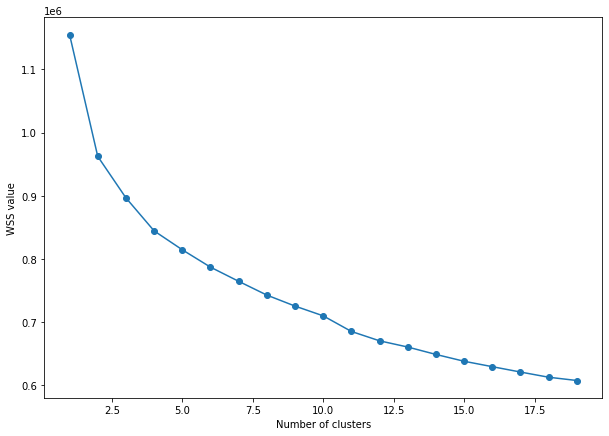

In [372]:
# vizualization of WSS value
plt.figure(figsize=(10,7))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS value')

In [373]:
# predict with 3 clusters
means = KMeans(n_clusters=3, random_state=1234)
means.fit(X_scaled)
y_kmeans = means.predict(X_scaled)

In [374]:
# predictions
y_kmeans

array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

In [375]:
centers = means.cluster_centers_

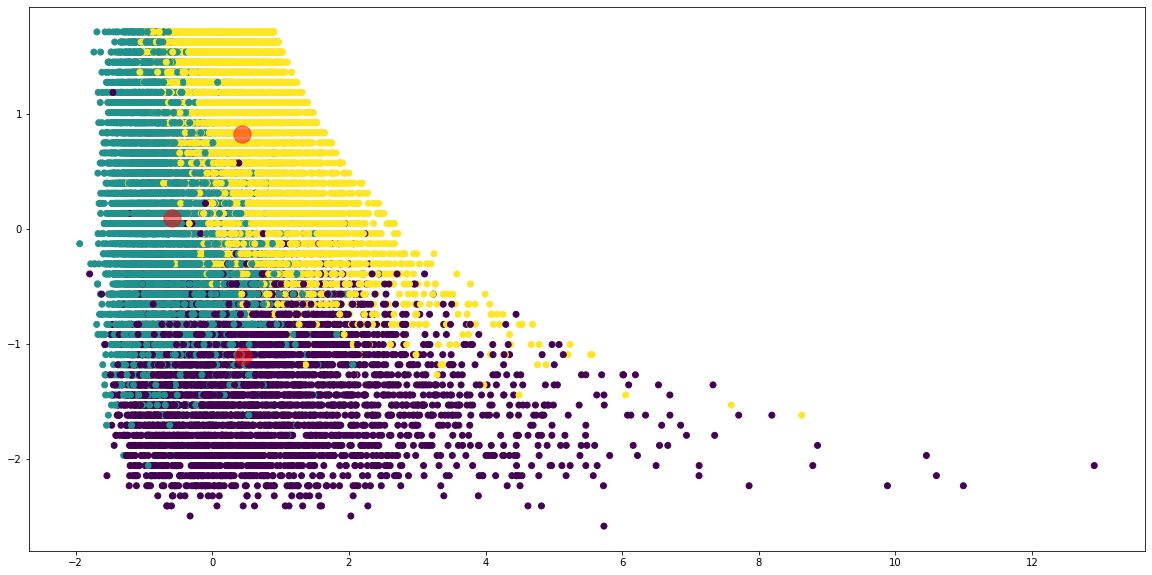

In [376]:
# vizualization of clusters
plt.figure(figsize=(20,10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans)
plt.scatter(centers[:,0], centers[:, 1], c='red', s=300, alpha=0.5)

In [377]:
# join predictions 
data['clusters'] = y_kmeans

In [378]:
data['age_group'] = age_group
data.head()

,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,clusters,age_group
0,269.5328,46,2,102.9252,119,12398.51,1114,26,4,1,...,0.081007,1,1,60,12,963.01,1,1,2,_x0033_5-45
1,359.9902,36,4,100.2813,130,12959.65,1024,29,3,1,...,0.036766,1,0,91,15,1534.69,1,1,2,_x0032_5-35
2,329.3200,9,4,102.2027,29,2963.88,170,24,1,1,...,0.112974,1,1,13,2,1514.48,1,1,0,_x0032_5-35
3,385.8105,51,8,48.8550,404,19676.34,2486,33,3,1,...,0.027406,1,0,68,35,1872.24,1,1,2,_x0034_5-55
4,310.2800,8,4,108.5789,25,2482.24,255,26,2,1,...,0.042788,1,1,22,3,557.97,1,1,0,_x0032_5-35


In [379]:
data.groupby('clusters').agg(
    {'Amount_LastMonth': 'sum',
     'Checks_LastMonthqnt': 'count',
     'Amount_LastMonth': 'sum', 
     'Total_amount': 'sum', 
     'Count_transac': 'count', 
     'InWeek_amount': 'mean', 
     'SKU_price_mean': 'mean',
     'Checkinmonth_average': 'mean',
     'Check_qntlast6mnth': 'sum',
     'Count_shop': 'sum',
     'Checkamount_mean': 'mean',
     'Age': 'median',
     'Amount_last6mnth': 'sum',
     'Days_pastvisit': 'mean',
     'Cat_householdchem_qnt': 'mean',
     'Cat_babyprod_qnt': 'sum',
     'Cat_babyprod_amount': 'sum',
     'Cat_babyprod_share': 'mean'
    }
)

,Amount_LastMonth,Checks_LastMonthqnt,Total_amount,Count_transac,InWeek_amount,SKU_price_mean,Checkinmonth_average,Check_qntlast6mnth,Count_shop,Checkamount_mean,Age,Amount_last6mnth,Days_pastvisit,Cat_householdchem_qnt,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share
clusters,,,,,,,,,,,,,,,,,
0,5.343991e+06,7268,5.090231e+07,7268,380.930348,16.672221,2.019813,22989,21925,257.329058,39.0,8.114021e+06,10.406026,79.147633,158593,4.591247e+06,0.088986
1,8.933167e+06,11851,8.751182e+07,11851,229.260774,11.865059,2.430343,95904,46192,107.557998,43.0,1.139942e+07,3.993925,126.570500,247108,3.537702e+06,0.040654
2,1.147407e+07,8389,1.255461e+08,8389,378.321143,12.186353,3.228752,101628,38024,148.174385,40.0,1.179029e+07,2.694838,254.724639,444347,7.209598e+06,0.057672


In [380]:
data.groupby('clusters')['Response_communcation'].apply(lambda x: x[x == 1].count())

clusters
0    5627
1    6438
2    2992
Name: Response_communcation, dtype: int64

In [381]:
data.groupby('clusters')['Discount_LastMonth'].apply(lambda x: x[x == 1].count())

clusters
0     5988
1    11147
2     8195
Name: Discount_LastMonth, dtype: int64

In [382]:
data.groupby('age_group')['clusters'].apply(lambda x: x[x == 2].count())

age_group
-999                 74
_x0030_-25          518
_x0032_5-35        2278
_x0033_5-45        2319
_x0034_5-55        1567
_x0035_5-65        1121
_x0036_5_x002B_     512
Name: clusters, dtype: int64

In [383]:
data.drop(['age_group'], inplace=True, axis=1)
data.drop(['clusters'], inplace=True, axis=1)
X_clustered = pd.DataFrame(X_scaled, index=data.index, columns=data.columns)
X_clustered["cluster"] = y_kmeans

In [384]:
X_clustered.head()

,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,...,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,cluster
0,-0.313240,1.277995,-0.469127,-0.507399,0.577677,0.594407,0.774279,-0.183978,0.051292,-0.269215,...,0.801765,0.458126,0.006029,0.909354,0.827102,0.499491,0.045478,0.043937,0.293232,2
1,0.312813,0.399212,1.190434,-0.531105,0.751617,0.713413,0.575041,0.558955,-0.311322,-0.269215,...,-0.145592,-0.446956,0.006029,-1.099682,2.131548,0.915174,1.012913,0.043937,0.293232,2
2,0.100546,-1.973502,1.190434,-0.513877,-0.845465,-1.406488,-1.315509,-0.679266,-1.036549,-0.269215,...,-0.399769,1.112086,0.006029,0.909354,-1.150605,-0.886120,0.978713,0.043937,0.293232,0
3,0.491514,1.717387,4.509555,-0.992197,5.084295,2.137888,3.811557,1.549531,-0.311322,-0.269215,...,-0.032936,-0.638442,0.006029,-1.099682,1.163733,3.686395,1.584138,0.043937,0.293232,2
4,-0.031230,-2.061380,1.190434,-0.456708,-0.908716,-1.508634,-1.127340,-0.183978,-0.673935,-0.269215,...,-0.810067,-0.323760,0.006029,0.909354,-0.771895,-0.747559,-0.639958,0.043937,0.293232,0


In [387]:
X_clustered[(X_clustered['Communication_3month'] < -25)] = -25

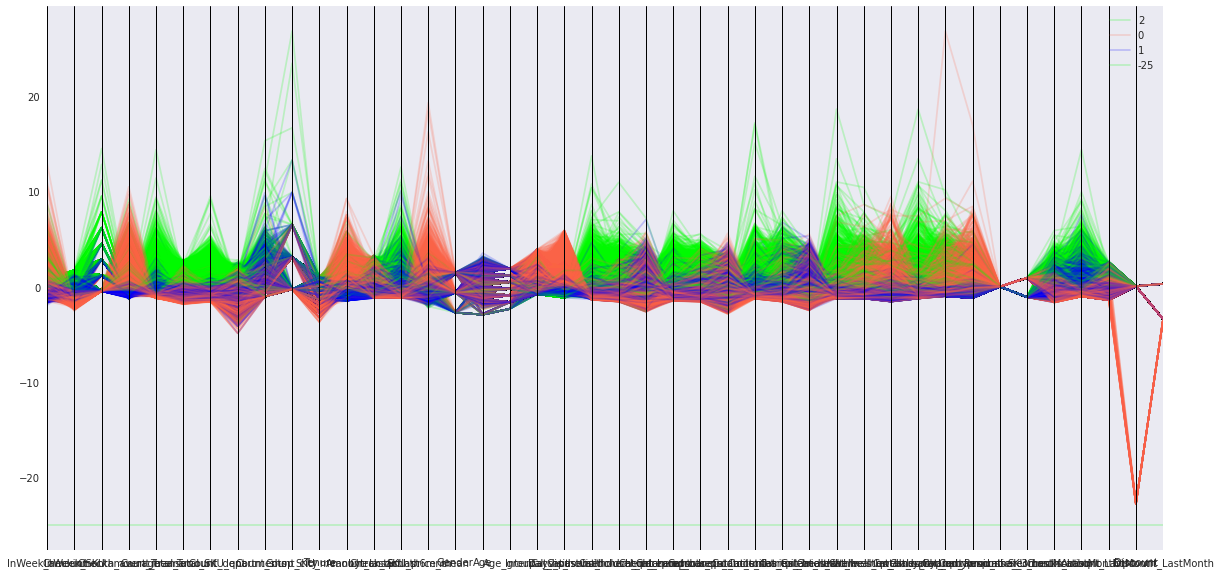

In [388]:

with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(20,10))
    pd.plotting.parallel_coordinates(X_clustered, "cluster",
                                     color=("lime", "tomato", "blue"),
                                     alpha=0.2)

In [ ]:
"""
cluster 0 (red):
high ranking InWeek_amount, Checkamount_mean, SKU_meanbytransac, SKU_price_mean, Interval_visit, Days_pastvisit, Cat_babyprod_share, Cat_healthwellnes_share
low ranking Cat_toiletries_share, Check_qntlast6mnth, Checks_LastMonthqnt, SKU_LastMonthqnt, Discount, Tenure
Относительно новые клиенты или с низкой активностью за последний период. У группы хороший показатель Response_communcation, 
можно предлагать популярные товары для этой группы - Cat_babyprod, Cat_healthwellnes. Высокие показатели InWeek_amount, Checkamount_mean


cluster 1 (blue):
high ranking Count_shop, Count_city, Cat_toiletries_share, Age, Checks_LastMonthqnt, SKU_LastMonthqnt
low ranking InWeek_amount, Checkamount_mean, SKU_meanbytransac, SKU_price_mean
Группа, которая больше всех воспользовалась Discount_LastMonth, высокий показатель Response_communcation. 
Учитывая высокий ранк Cat_toiletries_share, можно делать акции на эту категорию товара.


cluster 2 (green):
Постоянные клиенты
high ranking Total_amount, Checkinmonth_average, InWeek_SKU, Count_transac, Total_SKU_qnt, Count_shop, Check_qntlast6mnth, Amount_last_mnth, Count_departments
"""